## Урок 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных.

**1. Даны значения зарплат из выборки выпускников:**

```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
**Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки. Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.**

In [85]:
s = (100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150)
s_len = len(s)

Среднее арифметическое $\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i$.

In [86]:
s_mean = sum(s) / s_len
s_mean

73.14285714285714

Смещённая оценка дисперсии $\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$.

In [87]:
s_var_offset = sum((x - s_mean)**2 for x in s) / s_len
s_var_offset

2135.074829931973

Несмещенная оценка дисперсии $\sigma_{unbiased}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$.

In [88]:
s_var = sum((x - s_mean)**2 for x in s) / (s_len - 1)
s_var

2241.8285714285716

**Ответ: среднее арифметическое 73.14; смещённая оценка 2135.07; несмещённая оценка 2241.83.**

**2. Для выборки из задачи 1 найти (также без использования библиотек): 1) медиану, первый и третий квартили, интерквартильное расстояние; 2) выборсы в выборке (используя для этого метод как при построении "усов" из boxplot). Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.**

In [89]:
s_sorted = sorted(s)
s_len

21

Число 20 делится на 2 и на 4, поэтому значениями медианы, первого квартиля и третьего квартиля будут элементы отсортированного исходного массива. 11-й, 6-й и 16-й соответственно.

In [90]:
# медиана
s_median = s_sorted[(s_len - 1) // 2]
s_median

70

In [91]:
# первый квартиль
q1 = s_sorted[(s_len - 1) // 4]
q1

45

In [92]:
# третий квартиль
q3 = s_sorted[(s_len - 1) * 3 // 4]
q3

84

In [93]:
# выбросы
iqr = q3 - q1
s_emissions = list(filter(lambda x: x < q1-iqr*1.5 or x > q3+iqr*1.5, s_sorted))
s_emissions

[150, 230]

**Ответ: 1) медиана 70; первый квартиль 45; третий квартиль 84. 2) выбросы 150, 230.**

In [94]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


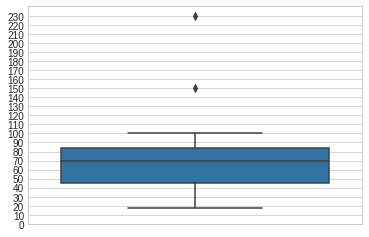

In [95]:
print(s_sorted)
sns.boxplot(s, orient='v')
plt.yticks(np.arange(0, 240, 10))
plt.show()

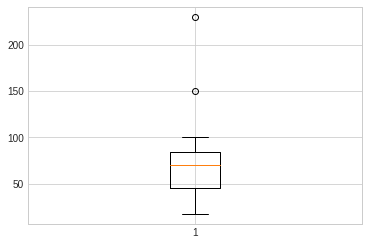

In [96]:
plt.boxplot(s)
plt.show()

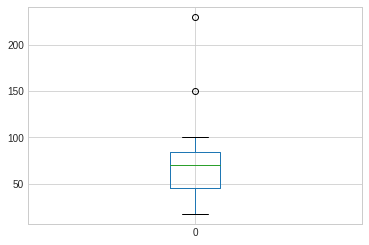

In [97]:
pd.DataFrame(s).boxplot()
plt.show()

На графиках усы соответствуют максимальному и минимальному значению выборки из `S` таких элементов `X`, что $Q1-1.5 \cdot IQR \leq X \leq Q3+1.5 \cdot IQR$. 

**3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?**

***Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.***

Обозначим $A_X$ - обытие что студент учится на факультете $X$. $B$ - событие, что студент сдал первую сессию. Тогда 
$$P(A_A) = P(A_B) = 0.25, P(A_C) = 0.5$$
$$P(B|A_A) = 0.8, P(B|A_B) = 0.7, P(B|A_C) = 0.9$$

Требуется найти вероятности $P(A_A|B), P(A_B|B), P(A_C|B)$.

Воспользуемся формулой Байеса
$$P(A|B)=\frac{P(B|A) \cdot P(A)}{P(B)}$$

Найдём $P(B)$ по формуле полной вероятности.
$$P(B) = P(B|A_A) \cdot P(A_A) + P(B|A_B) \cdot P(A_B) + P(B|A_C) \cdot P(A_C)$$
$$P(B) = 0.8 \cdot 0.25 + 0.7 \cdot 0.25 + 0.9 \cdot 0.5 = 0.825$$

Посчитаем искомые вероятности. 
$$P(A_A|B) = \frac{0.8 \cdot 0.25}{0.825} = 0.24(24)$$
$$P(A_B|B) = \frac{0.7 \cdot 0.25}{0.825} = 0.21(21)$$
$$P(A_C|B) = \frac{0.9 \cdot 0.5}{0.825} = 0.54(54)$$

**Ответ: а) 0.24(24); б) 0.21(21); с) 0.54(54).**